In [379]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [380]:
dataset_path = 'dm_stories_tokenized/'
files = os.listdir(dataset_path)

In [381]:
print(open(dataset_path + files[0]).read())

By
Helen Pow

PUBLISHED :

18:03 EST , 15 May 2013


|

UPDATED :

11:09 EST , 16 May 2013

Tragic : Former beauty queen Rachel Swetnam , pictured , and her pal Trey Varner were killed in a devastating boat crash on an Oklahoma lake on Tuesday

A former beauty queen and a male friend who studied with her at the University of Arkansas have been killed in a devastating boat crash on an Oklahoma lake .

Rachel Nicole Swetnam , 21 , who was Miss Teen Oklahoma in 2010 , and William ` Trey ' Lewis Varner III , also 21 , died when the 22-foot ski boat they were in collided with a docked houseboat on Grand Lake around 5:30 p.m. Tuesday .

GRDA Assistant General Manager Brian
Edwards told KOTV that the ski boat was driving fast in the Arrowhead
Yacht Club , causing a ` substantial , violent impact . ' According to KMRG , investigators also believe the boat 's driver may have been drinking .

The students were among eight passengers on the boat and were seated at the front of the vessel when it 

In [382]:
documents = []
summaries = []
desired_lengths = {2, 3, 4, 5}
summary_lengths = {}
index = 0

for filename in files:
    in_summary = False
    summary = []
    document = []
    with open(dataset_path + filename, 'r') as file:
        lines = file.readlines()
        for line in lines:        
            line = line.strip()
            if '@highlight' in line:
                in_summary = True
                continue
                
            if (len(line) == 0):
                continue
                
            if in_summary:
                summary.append(line)
            else:
                document.append(line)
        documents.append('. '.join(document))
        summaries.append('. '.join(summary))
        file.close()
        
    if (len(summary) not in desired_lengths):
        continue
        
    if str(len(summary)) in summary_lengths:
        summary_lengths[str(len(summary))].append(index)
    else:
        summary_lengths[str(len(summary))] = [index]
        
    index += 1

In [383]:
print("DOC: ----- \n" + documents[0])
print("SUMMARY: ----- \n" + summaries[0])
print("LENGTHS: -----\n" + str(summary_lengths))

DOC: ----- 
By. Helen Pow. PUBLISHED :. 18:03 EST , 15 May 2013. |. UPDATED :. 11:09 EST , 16 May 2013. Tragic : Former beauty queen Rachel Swetnam , pictured , and her pal Trey Varner were killed in a devastating boat crash on an Oklahoma lake on Tuesday. A former beauty queen and a male friend who studied with her at the University of Arkansas have been killed in a devastating boat crash on an Oklahoma lake .. Rachel Nicole Swetnam , 21 , who was Miss Teen Oklahoma in 2010 , and William ` Trey ' Lewis Varner III , also 21 , died when the 22-foot ski boat they were in collided with a docked houseboat on Grand Lake around 5:30 p.m. Tuesday .. GRDA Assistant General Manager Brian. Edwards told KOTV that the ski boat was driving fast in the Arrowhead. Yacht Club , causing a ` substantial , violent impact . ' According to KMRG , investigators also believe the boat 's driver may have been drinking .. The students were among eight passengers on the boat and were seated at the front of the v

In [384]:
def plot_topic_range_error(summary_length, topic_range, summary_lengths, documents, summaries):
    filtered_ids = summary_lengths[summary_length]
    filtered_documents = [documents[doc_id] for doc_id in filtered_ids]
    filtered_summaries = [summaries[doc_id] for doc_id in filtered_ids]
    errors = {}

    for num_topics in topic_range:
        document_vectorizer = CountVectorizer()
        summary_vectorizer = CountVectorizer()

        doc_vector = document_vectorizer.fit_transform(filtered_documents)
        summ_vector = summary_vectorizer.fit_transform(filtered_summaries)

        document_lda = LDA(n_components=num_topics, learning_method='online')
        summary_lda = LDA(n_components=num_topics, learning_method='online')

        document_lda.fit(doc_vector)
        summary_lda.fit(summ_vector)

        doc_topics = document_lda.transform(doc_vector)
        summ_topics = summary_lda.transform(summ_vector)

        for doc_id in range(len(filtered_ids)):
            topic_error = sum(np.square(doc_topics[doc_id] - summ_topics[doc_id])) / num_topics

            if num_topics in errors:
                errors[num_topics] += topic_error
            else:
                errors[num_topics] = topic_error

    topic_errors = [errors[n_topics] for n_topics in errors]
    plt.plot(topic_range, topic_errors)
    plt.xlabel('Number of Topics')
    plt.ylabel('Sum of Squared Errors')
    plt.title('Length: ' + summary_length + ' Sentences')

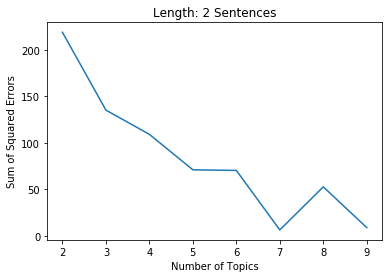

In [385]:
plot_topic_range_error('2', np.arange(2, 10), summary_lengths, documents, summaries)

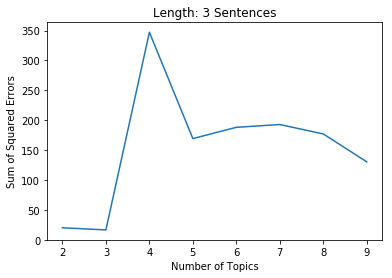

In [386]:
plot_topic_range_error('3', np.arange(2, 10), summary_lengths, documents, summaries)

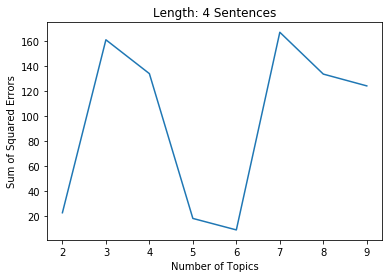

In [ ]:
plot_topic_range_error('4', np.arange(2, 10), summary_lengths, documents, summaries)

In [ ]:
plot_topic_range_error('5', np.arange(2, 10), summary_lengths, documents, summaries)